# Discovery of the p53 targetome in MCF7 cells from RNA-seq data

Transcription factors are important regulators of genes. A well known transcription factor is p53 which suppresses tumor by regulating several genes. MCF7 in breast cancer cell lines continuously degrade P53 hence sustaining oncogenity. In this study, Nutlin-3a was added to the cells to inhibit MCF7 so p53 can mediate the elimination of tumorigenic cells. The cells treated with Nutlin-3a are termed stimulated (S) whereas the wild type cells without Nutlin-3a are termed Non-stimulated (NS). 

In this analysis, two replicates of the stimulated (S1 and S20 cells and Non-stimulated cells were used. The aim is to discover the genes upregulated or downregulated by the activation of p53 in cancer cell lines. The genes upregulated by the activation of p53 will serve as positive controls of this RNASeq analysis. Examples of such known genes are BBC3 (a mediator of apoptosis), CDKN1A (promotes cell cycle arrest) and RRM2B (causes mitochondrial DNA depletion). On the other hand, the genese that are downregulated by p53 will serve as negative conrol. Examples of such kniwn genes are TIMELESS, FEN1 and DEK. 

In [2]:
# create directory for the analysis
mkdir -p /mnt/storage/$USER/jupyternotebooks/RNASeq
cd /mnt/storage/$USER/jupyternotebooks/RNASeq

In [3]:
# Convert SRA files to fastq format using the code:
# fastq-dump --split-files SRR number where SRR Number represents the run identifier of the sequence
# NS1 = SRR867127, NS2 = SRR867128, S1 = SRR867129 and S2 = SRR867130
# Note that --split-files is useful for paired reads. 

#For this project, this can  be done using a for loop as follows:
#    for i in SRR867127 SRR867128 SRR867129 SRR867130
#    do 
#        fastq-dump -O . --split-files $i 
#    done

In [4]:
# For this project, I made a symbolic link to the already pregenerated fastq files
ln -sf /mnt/nfs/data/RNA-seq/MCF7/*.fastq .

*Fastq Quality control*

In [6]:
# write a for loop to perform quality check on the fastq files
mkdir -p FastQC
for i in NS1.fastq NS2.fastq S1.fastq S2.fastq 
do
    fastqc -o ./FastQC $i
done

 *Mapping and alignment*
 
 

In [ ]:
# We will use the human genome assembly - hg19

In [23]:
# Alignment for NS1 data
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn NS1.fastq \
     --outFileNamePrefix NS1.


Jan 16 18:35:08 ..... started STAR run
Jan 16 18:35:08 ..... loading genome
Jan 16 18:35:24 ..... started mapping
Jan 16 18:42:35 ..... finished successfully


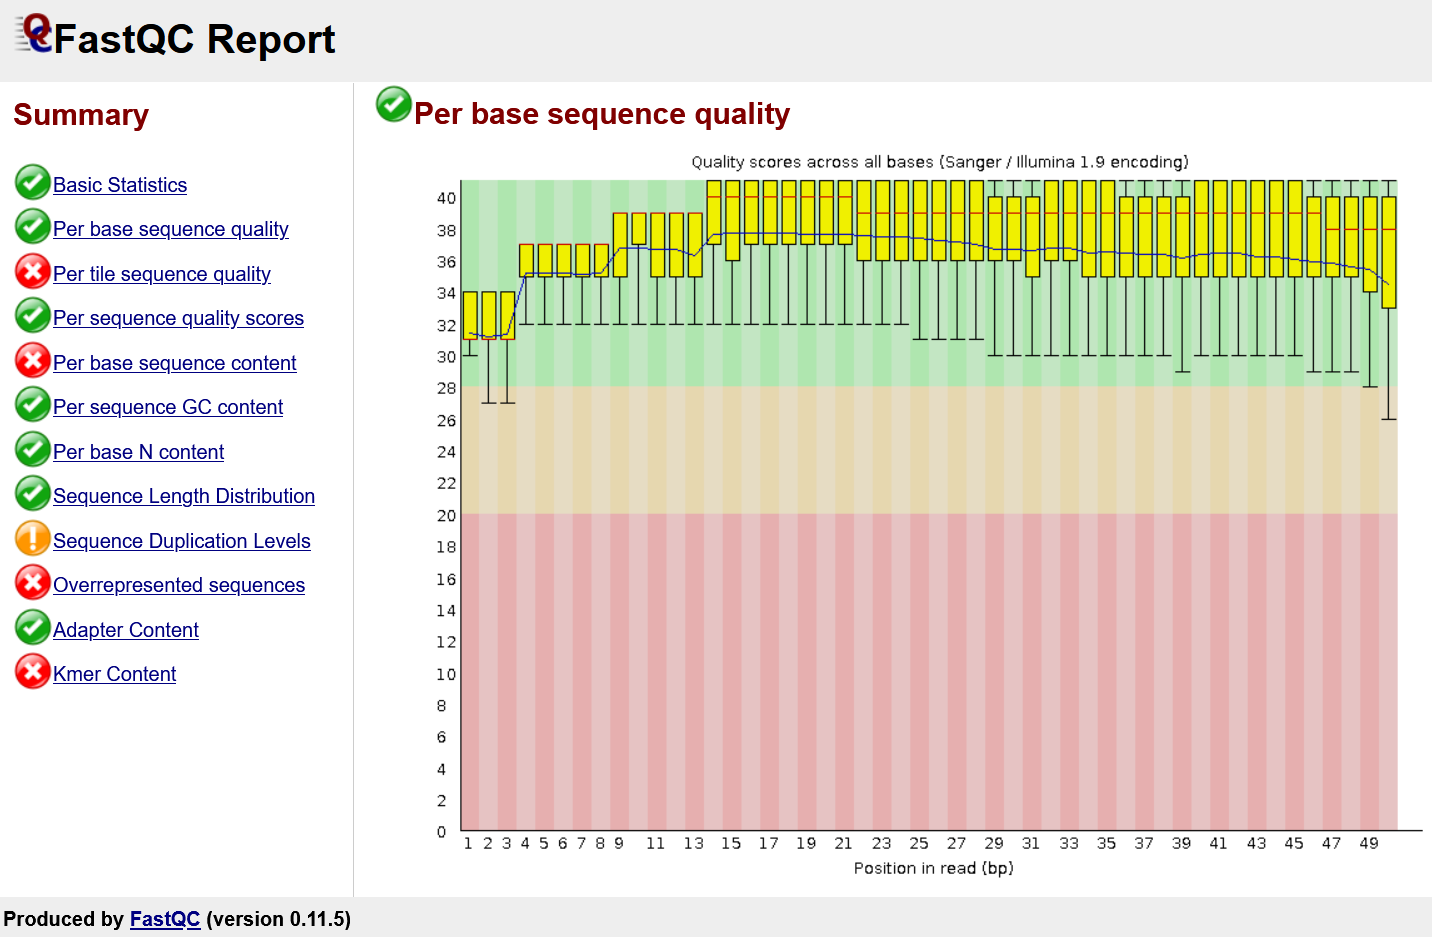

In [24]:
# Alignment for NS2 data
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn NS2.fastq \
     --outFileNamePrefix NS2.

Jan 16 18:46:27 ..... started STAR run
Jan 16 18:46:27 ..... loading genome
Jan 16 18:46:43 ..... started mapping
Jan 16 18:52:16 ..... finished successfully


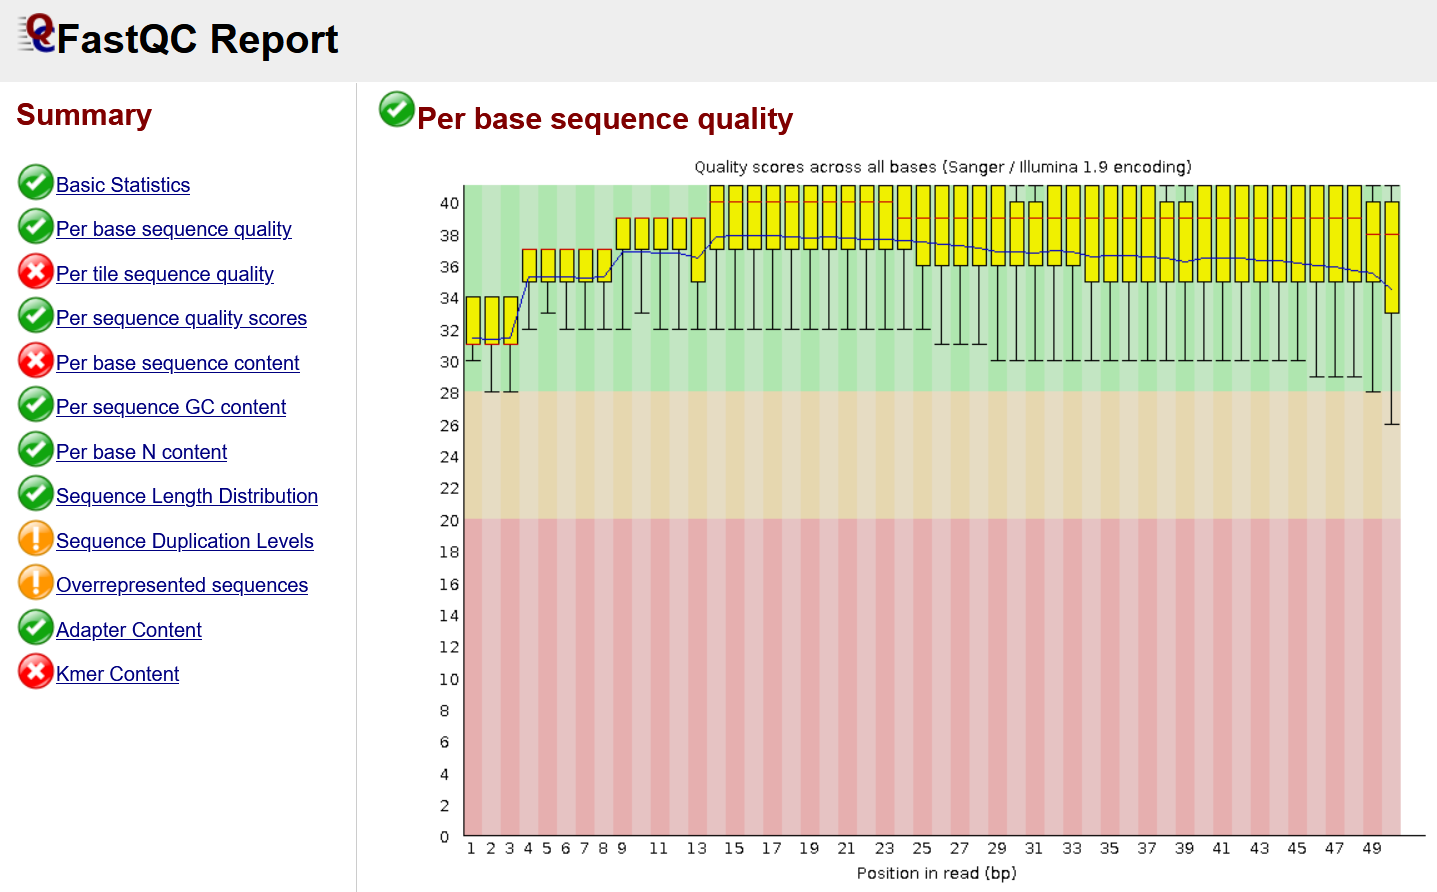

In [25]:
# Alignment for S2 data
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn S2.fastq \
     --outFileNamePrefix S2.

Jan 16 18:53:13 ..... started STAR run
Jan 16 18:53:13 ..... loading genome
Jan 16 18:53:31 ..... started mapping
Jan 16 18:58:55 ..... finished successfully


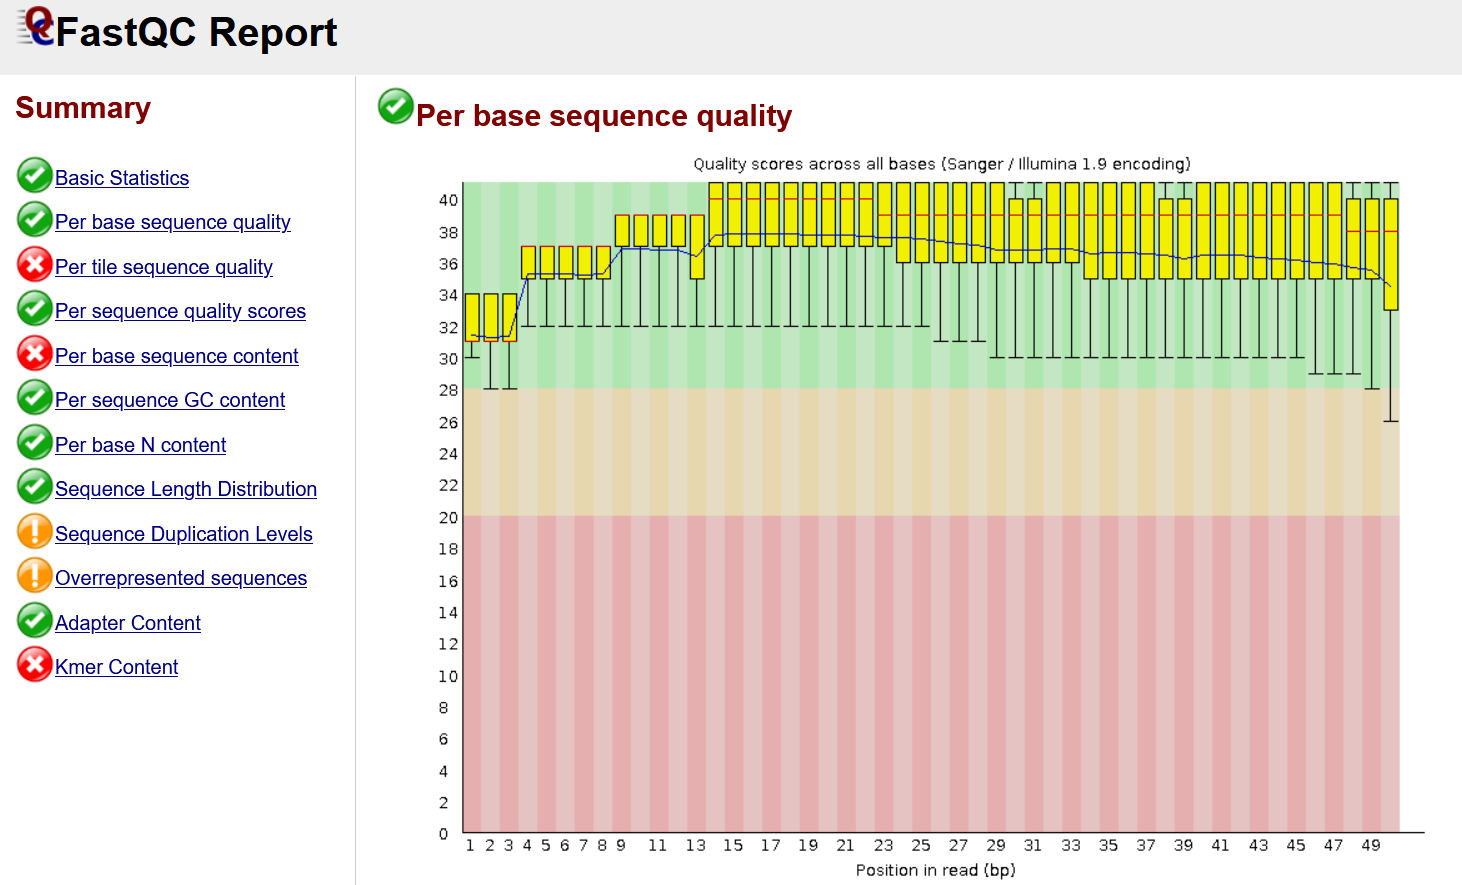

In [26]:
# Alignment for S1 data
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad NoSharedMemory \
     --runThreadN 2 \
     --readFilesIn S1.fastq \
     --outFileNamePrefix S1.

Jan 16 19:02:21 ..... started STAR run
Jan 16 19:02:21 ..... loading genome
Jan 16 19:02:38 ..... started mapping
Jan 16 19:11:27 ..... finished successfully


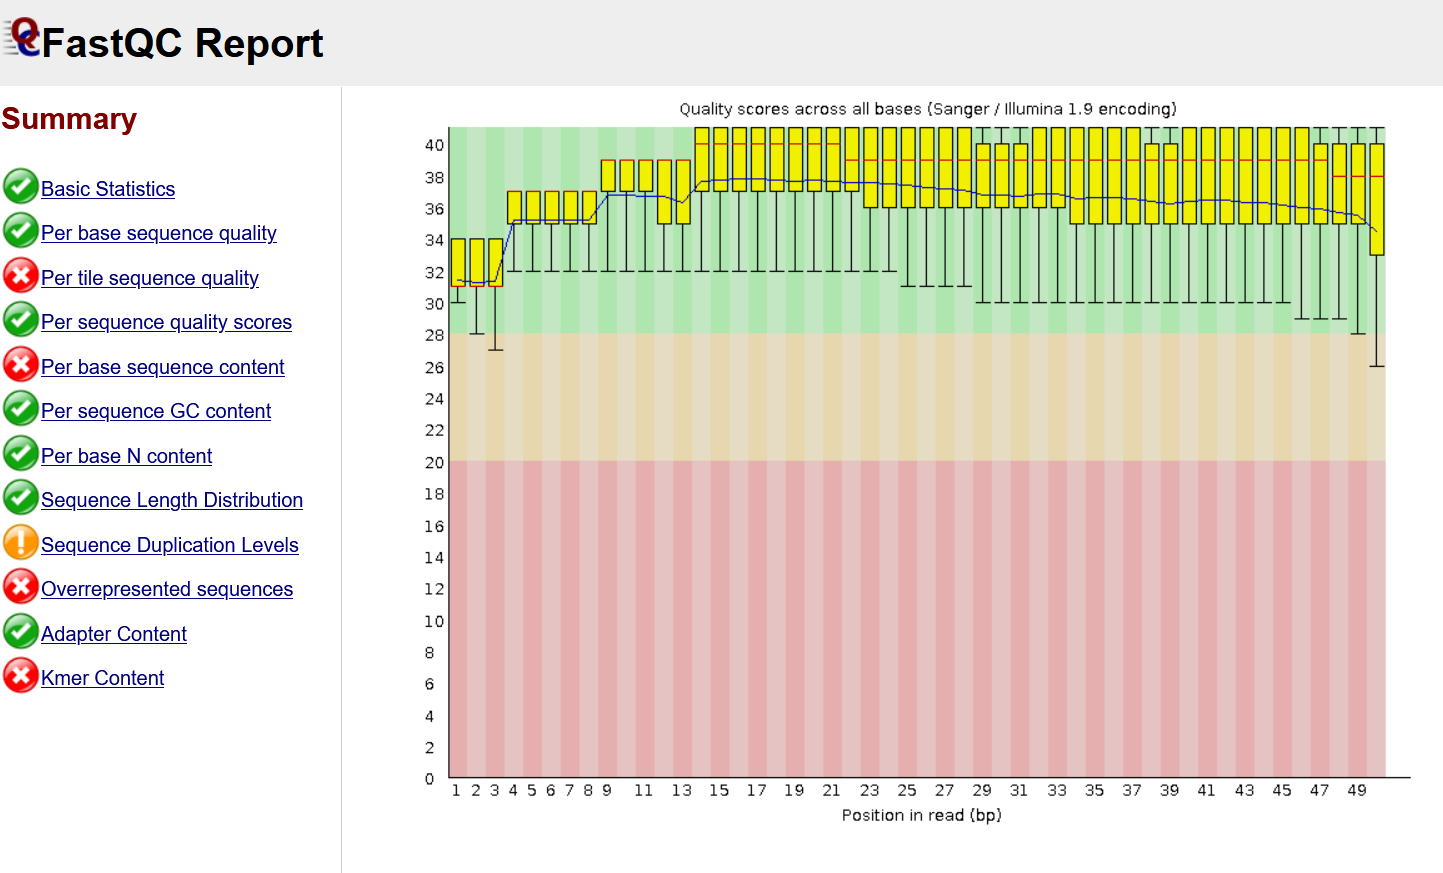

In [31]:
# 
head -34 S1.Aligned.out.sam | grep -v '^@'

SRR867129.1	0	chrM	7802	255	50M	*	0	0	CCTAGTCCTCATCGCCCTCCCATCCCTACGCATCCTTTACATAACAGACG	CCCFFDFFHHHHGGIJIJJJJIIIJJIEIGJJIJJIJJGJJIJFHIGHHG	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867129.2	0	chrM	13903	255	50M	*	0	0	CTCCAACATACTCGGATTCTACCCTAGCATCACACACCGCACAATCCCCT	CCCFFFFFHHHHHJJJJJJJJJGJJJJJJJJJJJJIIIJJJJJJJJIIJI	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867129.3	0	chr1	117118640	255	50M	*	0	0	CTGNTATTCTTATGGCAGTGAGAGGCAGGGAGAGAAAAATGAATANGGAA	CCC#4ADFHHHHHJJJJJIJIJGIJJIIJJ;C?DBFHJJIJIIIJ#-<BC	NH:i:1	HI:i:1	AS:i:47	nM:i:0
SRR867129.4	0	chr2	3595639	3	7M584N43M	*	0	0	GTTATACCATTTATCGTAAACATACTGTCTGTATACAGAACCAGTNTATT	@@@DDDBD?FHF>FBFHBECIHE<BC:<FDGACBGGHG>E>@GH@#0)8B	NH:i:2	HI:i:1	AS:i:49	nM:i:0
SRR867129.4	272	chr17	16587376	3	50M	*	0	0	AATANACTGGTTCTGTATACAGACAGTATGTTTACGATAAATGGTATAAC	B8)0#@HG@>E>GHGGBCAGDF<:CB<EHICEBHFBF>FHF?DBDDD@@@	NH:i:2	HI:i:2	AS:i:48	nM:i:0
SRR867129.5	272	chr17	8280988	1	23M2103N27M	*	0	0	AGTTTTAGCCTAGTGATAACCACCTTGCTGGGGTGAATGCCTACGTGGAC	HHEGHGJIGIGHEIGHGFCJIIGIGGJIIIIGIHGI

*Convert to BAM files*

In [32]:
samtools sort -o NS1.bam NS1.Aligned.out.sam

[bam_sort_core] merging from 8 files and 1 in-memory blocks...


In [33]:
samtools sort -o NS2.bam NS2.Aligned.out.sam

[bam_sort_core] merging from 7 files and 1 in-memory blocks...


In [34]:
samtools sort -o S1.bam S1.Aligned.out.sam

[bam_sort_core] merging from 10 files and 1 in-memory blocks...


In [35]:
samtools sort -o S2.bam S2.Aligned.out.sam

[bam_sort_core] merging from 6 files and 1 in-memory blocks...


*generate index for the BAM files*

In [36]:
for i in NS1.bam NS2.bam S1.bam S2.bam
do 
    samtools index $i
done

In [37]:
ls *.bai

NS1.bam.bai  NS2.bam.bai  S1.bam.bai  S2.bam.bai


*Inspect the Bam files*

In [41]:
samtools view S1.bam | head -3

SRR867129.798861	0	chrM	1	255	1S49M	*	0	0	GGATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCA	@@@ADDDDDBDDHEDEHIGGIJGGIJIIGJGEHJGB@0?FGGII@HHDFG	NH:i:1	HI:i:1	AS:i:48	nM:i:0
SRR867129.1322386	0	chrM	1	255	1S49M	*	0	0	GGATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCA	@@CFFFFFHGFHFGIJJJJIIGIJJJJJIJIGGGGBHGIJJJJIIEHIIJ	NH:i:1	HI:i:1	AS:i:48	nM:i:0
SRR867129.1592505	0	chrM	1	3	8S42M	*	0	0	TCACGATGGATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCT	@CCFDDDDHHHHHFGHIDDCDHGIIJJJJJJIIEHGHIIIJJIJJJJGII	NH:i:2	HI:i:2	AS:i:41	nM:i:0
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


In [8]:
# samtools idxstats shows many reads map to each chromosome. 
# The output shows chromosome name, sequence length, # mapped read-segments and # unmapped read-segments
samtools idxstats NS1.bam

chrM	16571	1129266	0
chr1	249250621	3291676	0
chr2	243199373	2349877	0
chr3	198022430	1703578	0
chr4	191154276	1020317	0
chr5	180915260	1940812	0
chr6	171115067	1726063	0
chr7	159138663	1655433	0
chr8	146364022	1268043	0
chr9	141213431	1581655	0
chr10	135534747	1125831	0
chr11	135006516	1830206	0
chr12	133851895	2892545	0
chr13	115169878	475334	0
chr14	107349540	1115773	0
chr15	102531392	1139961	0
chr16	90354753	2104247	0
chr17	81195210	2343202	0
chr18	78077248	342946	0
chr19	59128983	1766870	0
chr20	63025520	1112423	0
chr21	48129895	295550	0
chr22	51304566	665829	0
chrX	155270560	1190174	0
chrY	59373566	93964	0
*	0	0	0


*Visualize the mapping of reads to the control genes in the reference genome*

*An upregulated gene - CDKN1A*

It can be seen that the Nutlin-3a stimulated cells (pink colour) have more reads from CDKN1A compared to the non-stimulated cells (blue colour)

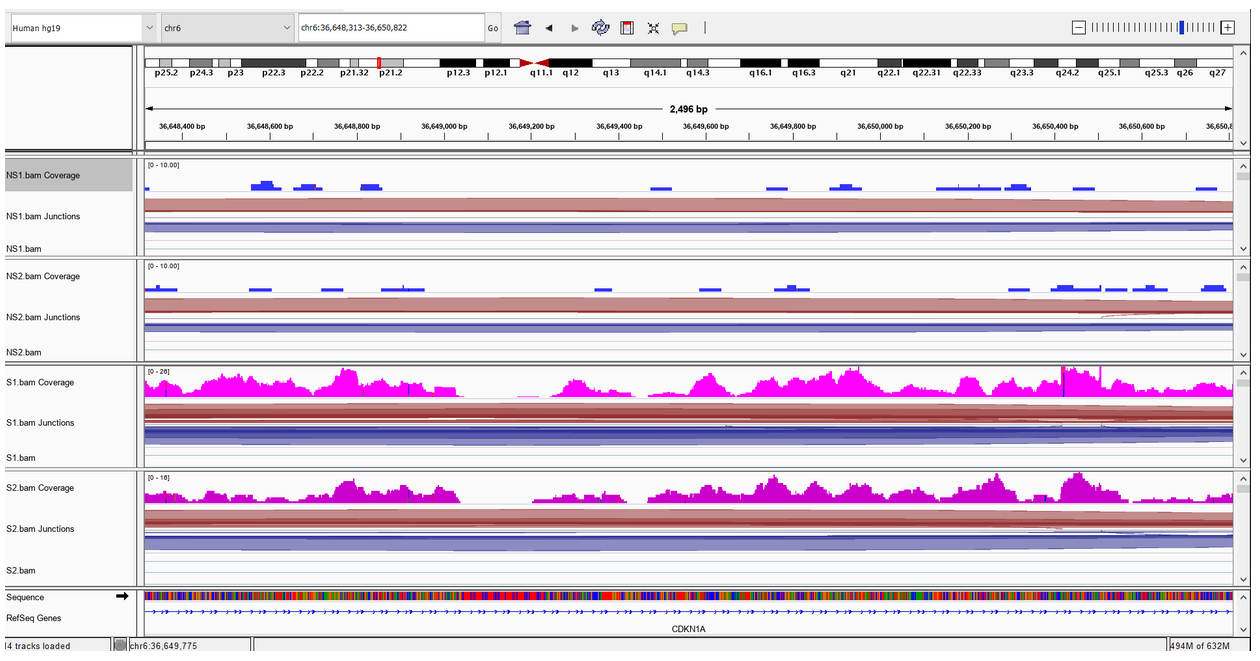

*A downregulated gene - FEN1*

It can be seen that the reads from FEN1 gene are more abundant in the non-stimulated cells (blue colour), compared to the stimulated cells (pink colour)

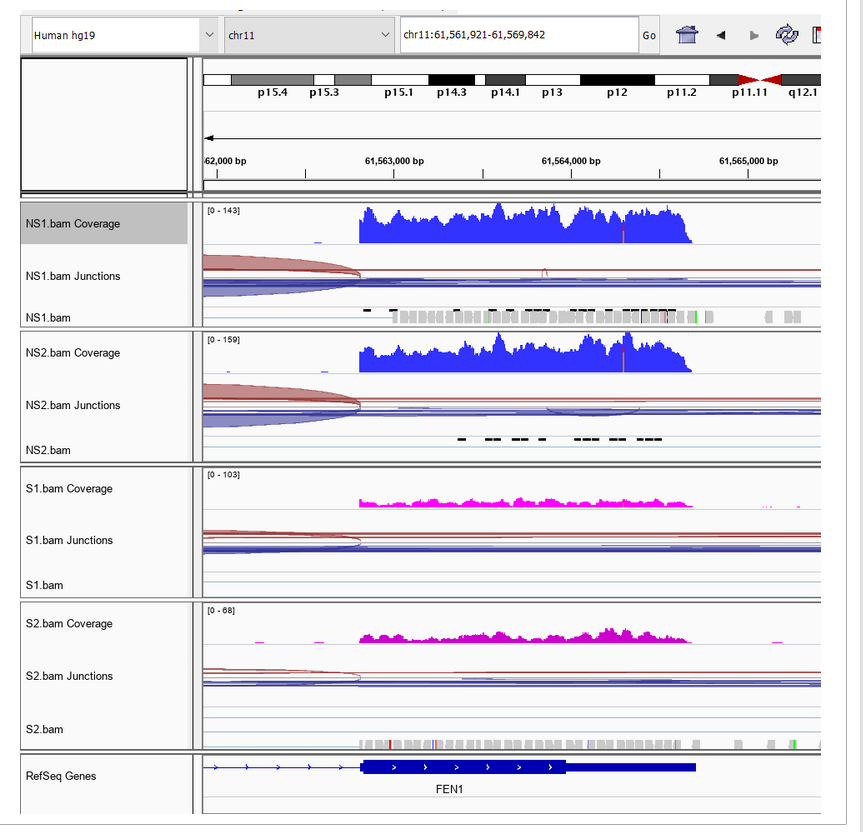

*Overlapping reads to gene count*

In [43]:
# A symbolic link is made to the hg19 annotation
ln -sf /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf
ls -l *gtf

lrwxrwxrwx 1 r0605462 domain users 56 Jan 16 20:30 gencode.v19.nopseudo.plus.sort.gtf -> /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf


In [66]:
# Counts the number of genomic features on the mapped reads. I used gene name as reference for counting the features
# this code couns the genomic features in the four BAM files
featureCounts -Q 10 -g gene_name -a gencode.v19.nopseudo.plus.sort.gtf -o gene.counts *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                           S NS1.bam                                        ||
||                           S NS2.bam                                        ||
||                           S S1.bam                                         ||
||                           S S2.bam                            

In [10]:
# Non-useful information are removed from the counts file
cut -f1,7- gene.counts | grep -v '^#' > all.gene.counts

In [69]:
head all.gene.counts

Geneid	NS1.bam	NS2.bam	S1.bam	S2.bam
MIR1302-11	0	0	0	0
FAM138A	0	0	0	0
OR4F5	0	0	0	0
RP11-34P13.7	0	0	0	1
RP11-34P13.8	0	0	0	0
AL627309.1	51	49	93	79
RP11-34P13.14	0	0	0	0
RP11-34P13.13	8	7	13	20
RNU6-1100P	0	0	0	0


Check the count of the positive control genes in the stimulated cells vs the non-stimulated cells. The result shows that these genes have higher count in the stimulated cells because of their upregulation by p53. The negative control genes have higher count of genes in the wild type cells ( Non-stimulated by Nutlin-3a). 

In [20]:
grep BBC3 all.gene.counts     # upregulated gene ---> positive control
grep RRM2B all.gene.counts    # upregulated gene ---> positive control
grep CDKN1A all.gene.counts   # upregulated gene ---> positive control
grep FEN1 all.gene.counts      # downregulated gene ---> negative control
grep TIMELESS all.gene.counts  # downregulated gene ---> negative control
grep DEK all.gene.counts       # downregulated gene ---> negative control

BBC3	197	136	1577	710
RRM2B	3208	3006	18455	9825
CDKN1A	2444	2145	74350	34632
FEN1	3135	2995	483	369
TIMELESS	5149	5141	1565	1202
DEK	6703	6744	2369	1729


The *all.gene.counts* file is used in downstream analysis